In [1]:
import numpy as np
import pandas as pd

import skimage.io as siio
import skimage.transform as sitr

In [2]:
import matplotlib.pyplot as plt

In [3]:
def show(img, y):
    plt.imshow(img)
    plt.scatter(y[::2], y[1::2])
    plt.show()

In [4]:
gt = pd.read_csv('data/gt.csv')

In [5]:
img = siio.imread('data/images/00008.jpg')
y = gt[gt.filename == '00008.jpg'][gt.columns[1:]].values[0]

In [6]:
def flip_img(img, y):
    y_ = y.copy()
    y_[::2] = img.shape[1] - y_[::2] - 1
    return (
        img[:, ::-1],
        y_.reshape(-1, 2)[
            [3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 10, 13, 12, 11]
        ].ravel()
    )

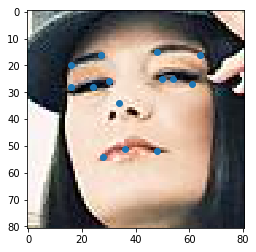

In [7]:
show(*flip_img(img, y))

In [8]:
def rotate_img(img, y):
    alpha = 20 * (np.random.rand() - 0.5)
    alpha_rad = np.radians(alpha)
    rot_mat = np.array([[np.cos(alpha_rad), -np.sin(alpha_rad)],
                        [np.sin(alpha_rad), np.cos(alpha_rad)]])
    bias = img.shape[0] / 2
    return sitr.rotate(img, alpha), (y - bias).reshape(-1, 2).dot(rot_mat).ravel() + bias

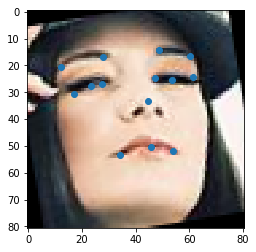

In [9]:
show(*rotate_img(img, y))

In [10]:
def cut_img(img, y):
    h = img.shape[0]
    lt = int(np.ceil(min(np.random.randint(0.05 * h, 0.15 * h), y.min())))
    rb = int(np.ceil(max(np.random.randint(0.85 * h, 0.95 * h), y.max())))
    return img[lt: rb, lt: rb], y - lt

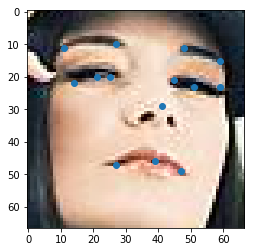

In [11]:
show(*cut_img(img, y))

In [54]:
N = 5000
indxs = np.random.choice(gt.shape[0], N, replace=True)
gt_new = gt.loc[indxs]
gt_new.index = range(N)
X = gt_new.values

In [56]:
for i in range(X.shape[0]):
    fn = X[i][0]
    y = X[i][1:]
    img = siio.imread('data/images/' + fn)
    img_r, y_r = rotate_img(img, y)
    siio.imsave('data/test_gen/images/' + fn, img_r)
    X[i][1:] = y_r

/home/ospanoff/.venvs/python3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [57]:
gt_test = pd.DataFrame(columns=gt_new.columns, data=X)

In [58]:
gt_test.head()

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,01826.jpg,22.9469,84.2124,48.0314,76.29,87.6991,44.8659,120.907,17.4752,33.2234,...,135.289,38.5263,92.9862,111.844,100.539,154.187,122.353,144.746,150.395,123.213
1,02925.jpg,26.8198,48.176,65.3751,42.3033,104.919,36.2802,134.878,33.74,37.8253,...,134.171,49.0207,92.4403,93.8152,63.4305,122.511,94.1425,124.913,129.667,112.422
2,05817.jpg,14.8513,31.9757,36.5139,20.8523,56.3192,18.0685,77.8108,20.0969,20.4985,...,75.8143,27.4464,50.0195,52.2784,36.263,69.3594,55.0781,66.7148,71.9126,64.3486
3,02139.jpg,41.9362,51.3636,82.8191,54.6183,125.086,50.9385,160.143,50.8676,52.2042,...,161.644,59.964,92.6077,113.246,80.972,142.65,108.489,152.179,138.326,137.799
4,04616.jpg,213.411,488.672,677.364,479.023,1052.26,441.551,1464.44,327.692,325.334,...,1404.7,558.983,910.535,1065.04,652.06,1279.45,954.055,1329.64,1213.94,1238.26


In [63]:
gt_test.drop_duplicates('filename').to_csv('data/test_gen/gt.csv', index=False)